In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq
from numpy.fft import ifft2
from numpy.fft import fft2
from numpy import cos
from numpy import sin
from numpy import sinh
from numpy import cosh
from numpy import exp
from numpy import pi


In [2]:
#bob paralela
x0=3e-3;
y0=2e-3;
c=2e-3;
l1=0.5e-3
l2=2.5e-3
z1=0.5e-3
z2=2.5e-3
N=400;
L0=980e-6
mu0=4*np.pi*10e-7;
I=1e-3
f=100e3; #frec
w=2*np.pi*f;
mur=1;
sigma=35.4e6;

In [6]:
# fava

k=lambda u,v : np.sqrt(u**2+v**2)
l=lambda u,v : np.sqrt(u**2+v**2 + 1j*w*mur*mu0*sigma)

# ec 8
fl=lambda u,v : (2*k(u,v)*mur*np.exp(l(u,v)*z))/(k(u,v)*mur+l(u,v))

# 

def K(u,v):
      return (mu0*I*Aii(u,v)*(np.exp(-k(u,v)*z1) -np.exp(-k(u,v)*z2) ))/(2*np.pi**2*(z2-z1)*c*u*v*k(u,v)**2)

def getk(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return fftshift(k)

def fxab(a,b):
    return 2*w*sigma*Dsii(a,b)*fl(a,b)*exp(l(a,b)*z)*b

def fyab(a,b):
    return -2*w*sigma*Dsii(a,b)*fl(a,b)*exp(l(a,b)*z)*a

c0=(mu0*N*I) /  (2*pi**2*c*(l2-l1))

Dsii=lambda u,v : (c0 * Aii(u,v)*( exp(-k(u,v)*(l2))-exp(-k(u,v)*(l1)))  )  /  (u*v*(-k(u,v))**2);

# ec 16:
def Aii(u,v):
    if u==v:
        res=c*cos(u*(x0 -y0))/2 - sin(u*(2*c+x0+y0))/(4*u) - sin(u*(x0+y0))/(4*u)
    else:
        r0=  (sin(c*(u-v)+ u*x0 - v*y0) - sin(u*x0 - v*y0) )/(2*(u-v))    

        r1=  (sin(c*(u+v)+ u*x0 + v*y0) - sin(u*x0 + v*y0))/(2*(u+v)) 

        res= r0 - r1
    return res

![](https://github.com/carabedo/ci_mutual/blob/main/theo2002/descarga.jpeg?raw=true)

In [14]:
# km 6000
# Nk 600

km=6000
Nk=600
av=np.linspace(-km,km+1,Nk);
bv=np.linspace(-km,km+1,Nk);
xv,yv=getk(av),getk(bv)

f=10000
z=0

ijx=np.zeros([Nk,Nk],dtype='complex')
ijy=np.zeros([Nk,Nk],dtype='complex')

In [17]:
vfxab=np.vectorize(fxab)
vfyab=np.vectorize(fyab)

In [22]:
%%time
ifx = vfxab(av[:,None], bv[None,:])
ify = vfyab(av[:,None], bv[None,:])
#vectorizado

Wall time: 20.9 s


In [21]:
%%time
for i,a in enumerate(av):
    for j,b in enumerate(bv):
        ijx[j,i] = fxab(a,b)
        ijy[j,i] = fyab(a,b)
#original

Wall time: 30.3 s


In [23]:
Jx,Jy=fftshift(ifft2(ifftshift(ijx))),fftshift(ifft2(ifftshift(ijy)))

In [8]:
wmax=np.abs(av[-1])+np.abs(av[0])
wmin=av[1]-av[0]
wmax,wmin

(12001.0, 20.03505843071798)

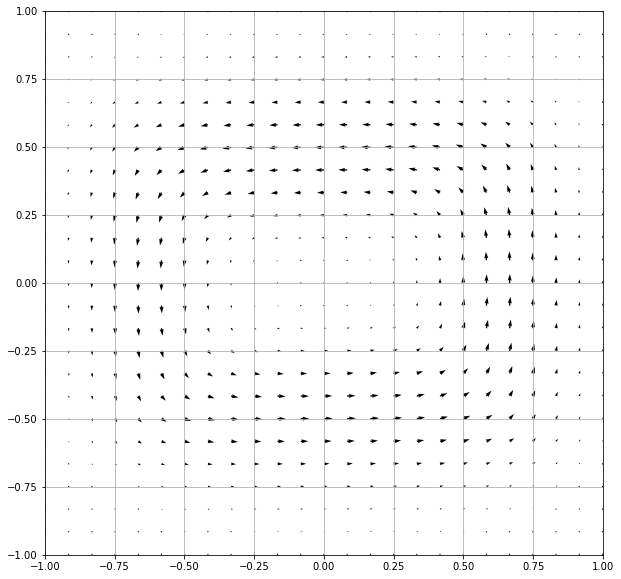

In [24]:
pngname=str(Nk)
lim=1
xvmm=xv/1e-3
yvmm=yv/1e-3
xx=xvmm[np.abs(xvmm) <lim]
yy=yvmm[np.abs(yvmm) <lim]
jxx,jyy=Jx[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim],Jy[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim]
plt.figure(figsize=[10,10])
plt.quiver(xv/1e-3,yv/1e-3,Jx.real*wmax,Jy.real*wmax)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.savefig('rect_para_fft' + pngname +'.png')
plt.grid(True)

NameError: name 'm' is not defined

In [29]:
M=np.array([[2,3,4],[2,3,4],[5,6,5]])

In [54]:
n=3000
xv=np.arange(n)
yv=np.arange(n)
Y=np.zeros([n,n])

In [56]:
np.meshgrid(xv,yv)

[array([[   0,    1,    2, ..., 2997, 2998, 2999],
        [   0,    1,    2, ..., 2997, 2998, 2999],
        [   0,    1,    2, ..., 2997, 2998, 2999],
        ...,
        [   0,    1,    2, ..., 2997, 2998, 2999],
        [   0,    1,    2, ..., 2997, 2998, 2999],
        [   0,    1,    2, ..., 2997, 2998, 2999]]),
 array([[   0,    0,    0, ...,    0,    0,    0],
        [   1,    1,    1, ...,    1,    1,    1],
        [   2,    2,    2, ...,    2,    2,    2],
        ...,
        [2997, 2997, 2997, ..., 2997, 2997, 2997],
        [2998, 2998, 2998, ..., 2998, 2998, 2998],
        [2999, 2999, 2999, ..., 2999, 2999, 2999]])]

In [55]:
%%timeit
for i,x in enumerate(xv):
    for j,y in enumerate(yv):
        Y[i,j]=x*y

2.9 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:

wmax=200
dw=0.5
wmin=0
av=np.arange(wmin,wmax,dw)
bv=np.arange(wmin,wmax,dw)

wmax=np.abs(w[-1])+np.abs(w[0])
wmax,wmin,len(w)

TypeError: 'float' object is not subscriptable

In [26]:

km=6000
Nk=600
av=np.linspace(0,km+1,Nk);
bv=np.linspace(0,km+1,Nk);
xv,yv=getk(av),getk(bv)

f=10000
z=0

ijx=np.zeros([Nk,Nk],dtype='complex')
ijy=np.zeros([Nk,Nk],dtype='complex')

for i,a in enumerate(av):
    for j,b in enumerate(bv):
        ijx[j,i] = fxab(a,b)
        ijy[j,i] = fyab(a,b)

Jx,Jy=fftshift(ifft2(ifftshift(ijx))),fftshift(ifft2(ifftshift(ijy)))

C:\Users\TodosC2\AppData\Local\Temp/ipykernel_8300/385214407.py:33: RuntimeWarning: invalid value encountered in double_scalars
  res=c*cos(u*(x0 -y0))/2 - sin(u*(2*c+x0+y0))/(4*u) - sin(u*(x0+y0))/(4*u)
C:\Users\TodosC2\AppData\Local\Temp/ipykernel_8300/385214407.py:28: RuntimeWarning: invalid value encountered in double_scalars
  Dsii=lambda u,v : (c0 * Aii(u,v)*( exp(-k(u,v)*(l2))-exp(-k(u,v)*(l1)))  )  /  (u*v*(-k(u,v))**2);


KeyboardInterrupt: 

# Loop para Nk

In [ ]:
nn=np.linspace(100,6000,dtype='int')

In [ ]:
 nn=[n for n in nn if n%2 == 0]

In [ ]:
for m in nn:
    Nk=200
    km=m
    av=np.linspace(-km,km+1,Nk);
    bv=np.linspace(-km,km+1,Nk);
    xv,yv=getk(av),getk(bv)

    f=10000
    z=0

    ijx=np.zeros([Nk,Nk],dtype='complex')
    ijy=np.zeros([Nk,Nk],dtype='complex')

    for i,a in enumerate(av):
      for j,b in enumerate(bv):
          ijx[j,i] = fxab(a,b)
          ijy[j,i] = fyab(a,b)

    Jx,Jy=fftshift(ifft2(ifftshift(ijx))),fftshift(ifft2(ifftshift(ijy)))
    pngname=str(m)
    lim=2
    xvmm=xv/1e-3
    yvmm=yv/1e-3
    xx=xvmm[np.abs(xvmm) <lim]
    yy=yvmm[np.abs(yvmm) <lim]
    jxx,jyy=Jx[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim],Jy[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim]
    fig=plt.figure(figsize=[10,10])
    plt.quiver(xv/1e-3,yv/1e-3,Jx.real,Jy.real)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title('N=200 kmax='+str(m) )
    plt.grid(True)
    plt.savefig('/content/imgur3/rect_para_fft' + pngname +'.png')
    plt.close(fig)

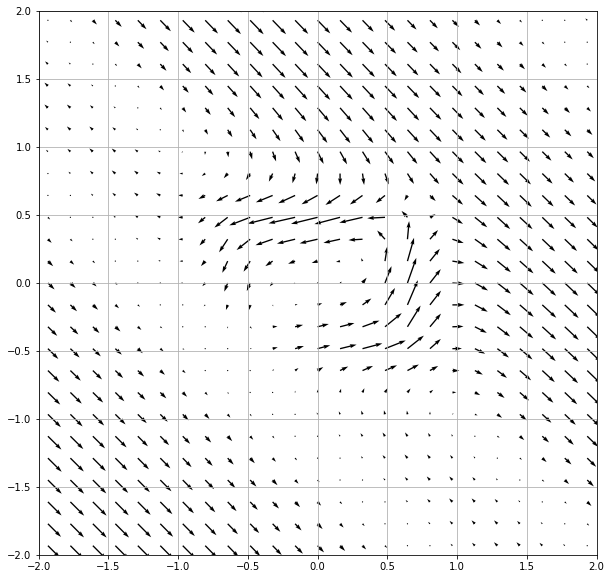

In [ ]:
lim=2
plt.figure(figsize=[10,10])
plt.quiver(xv/1e-3,yv/1e-3,Jx.real,Jy.real)

plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

plt.grid(True)

In [ ]:
!zip -r culo3.zip imgur3

  adding: imgur3/ (stored 0%)
  adding: imgur3/rect_para_fft702.png (deflated 27%)
  adding: imgur3/rect_para_fft1183.png (deflated 22%)
  adding: imgur3/rect_para_fft4193.png (deflated 14%)
  adding: imgur3/rect_para_fft3591.png (deflated 15%)
  adding: imgur3/rect_para_fft3230.png (deflated 15%)
  adding: imgur3/rect_para_fft2387.png (deflated 19%)
  adding: imgur3/rect_para_fft4795.png (deflated 13%)
  adding: imgur3/rect_para_fft4434.png (deflated 13%)
  adding: imgur3/rect_para_fft220.png (deflated 35%)
  adding: imgur3/rect_para_fft2267.png (deflated 19%)
  adding: imgur3/rect_para_fft2989.png (deflated 15%)
  adding: imgur3/rect_para_fft461.png (deflated 31%)
  adding: imgur3/rect_para_fft4916.png (deflated 13%)
  adding: imgur3/rect_para_fft4555.png (deflated 13%)
  adding: imgur3/rect_para_fft1544.png (deflated 21%)
  adding: imgur3/rect_para_fft6000.png (deflated 11%)
  adding: imgur3/rect_para_fft2146.png (deflated 20%)
  adding: imgur3/rect_para_fft4675.png (deflated 13%)
 

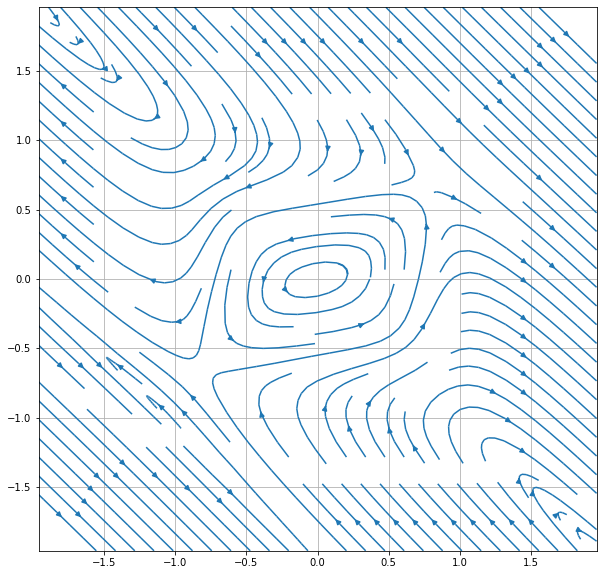

In [ ]:
lim=2
xvmm=xv/1e-3
yvmm=yv/1e-3
xx=xvmm[np.abs(xvmm) <lim]
yy=yvmm[np.abs(yvmm) <lim]
jxx,jyy=Jx[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim],Jy[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim]
plt.figure(figsize=[10,10])
plt.streamplot(xx,yy,jxx.real,jyy.real)
plt.grid(True)